In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [2]:
img_ = cv2.imread('./Panorama/institute2.jpg')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

img = cv2.imread('./Panorama/institute1.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [4]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [5]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)

In [6]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)

    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    #print H
else:
    raise AssertionError("Can't find enough keypoints.")

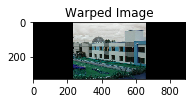

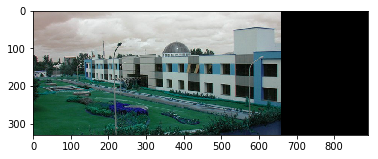

In [7]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('institute_output.jpg',dst)
plt.imshow(dst)
plt.show()